In [2]:
import os, pathlib 
ROOT_DIR = os.path.join(str(pathlib.Path.home()), "MonoGS")
print(f"Changing working directory to {ROOT_DIR}")
os.chdir(ROOT_DIR)


Changing working directory to /home/ubuntu/MonoGS


In [48]:
from utils.config_utils import load_config
from utils.dataset import load_dataset
import cv2
import numpy as np

In [49]:
# field of view in x and y, unit:radius; 2*tan(half_width/fx), 2*tan(half_height/fy)
from matplotlib import pyplot as plt
def demo_camera_property(dataset):
    fovx, fovy = dataset.fovx, dataset.fovy
    print(f"Field of view in x: {fovx}, y: {fovy} (unit: radius)")
    print(f"Field of view in x: {fovx * 180/np.pi}, y: {fovy * 180/np.pi} (unit: deg)")

    color_path = dataset.color_paths[0]
    image = np.array(cv2.imread(color_path))
    print(image.shape)
    undistorted_img =  cv2.remap(image, dataset.map1x, dataset.map1y, cv2.INTER_LINEAR)

    fig = plt.figure(figsize=(15, 10))

    ax1 = fig.add_subplot(2, 2, 1)
    ax1.imshow(dataset.map1x)
    ax1.set_title("Undistortion Map in x")
    ax1.set_axis_off()

    ax2 = fig.add_subplot(2, 2, 2)
    ax2.imshow(dataset.map1y)
    ax2.set_title("Undistortion Map in y")
    ax2.set_axis_off()

    ax3 = fig.add_subplot(2, 2, 3)
    ax3.imshow(image)
    ax3.set_title("Original Image")
    ax3.set_axis_off()

    ax4 = fig.add_subplot(2, 2, 4)
    ax4.imshow(undistorted_img)
    ax4.set_title("Undistorted Image")
    ax4.set_axis_off()


Field of view in x: 1.077429600489334, y: 0.837549677489292 (unit: radius)
Field of view in x: 61.73216883050525, y: 47.98806165267968 (unit: deg)
(480, 640, 3)


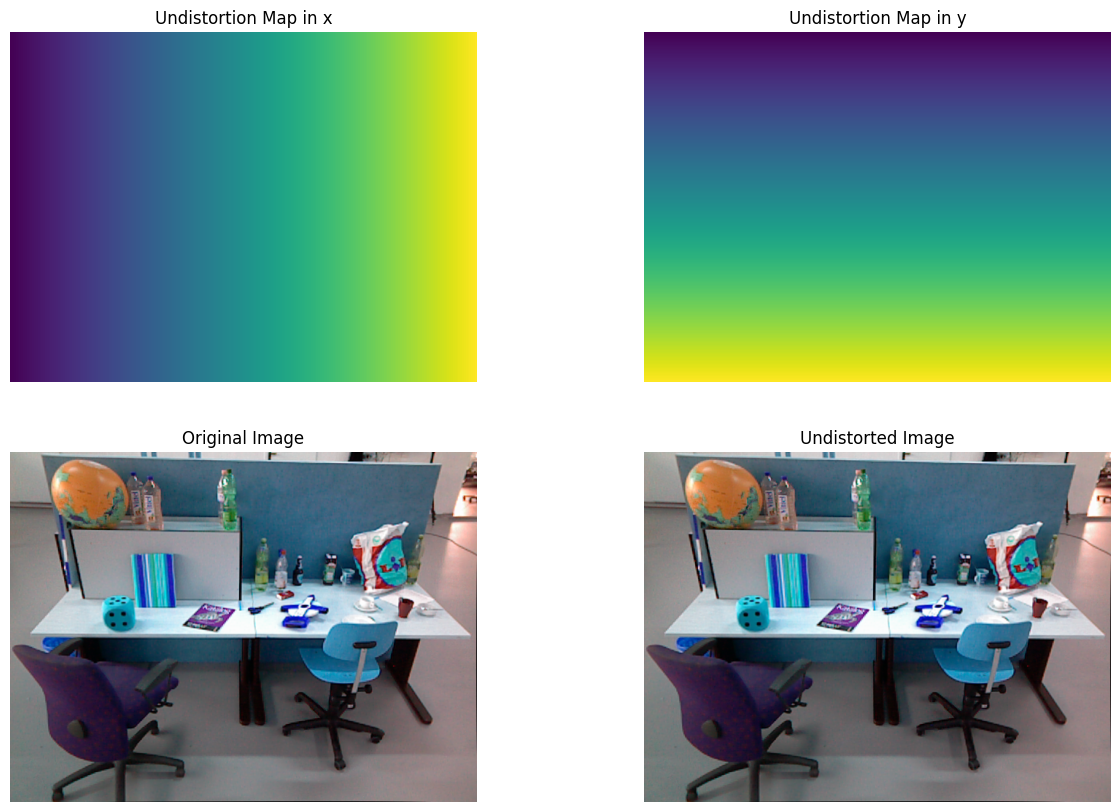

In [50]:
tum_config_path = "./configs/mono/tum/fr3_office.yaml" 
tum_config = load_config(tum_config_path)
tum_dataset = load_dataset(None, None, tum_config)
demo_camera_property(tum_dataset)

Field of view in x: 2.0764354491384576, y: 1.8094886833362596 (unit: radius)
Field of view in x: 118.97098766698514, y: 103.67606463185197 (unit: deg)
(2028, 2704, 3)


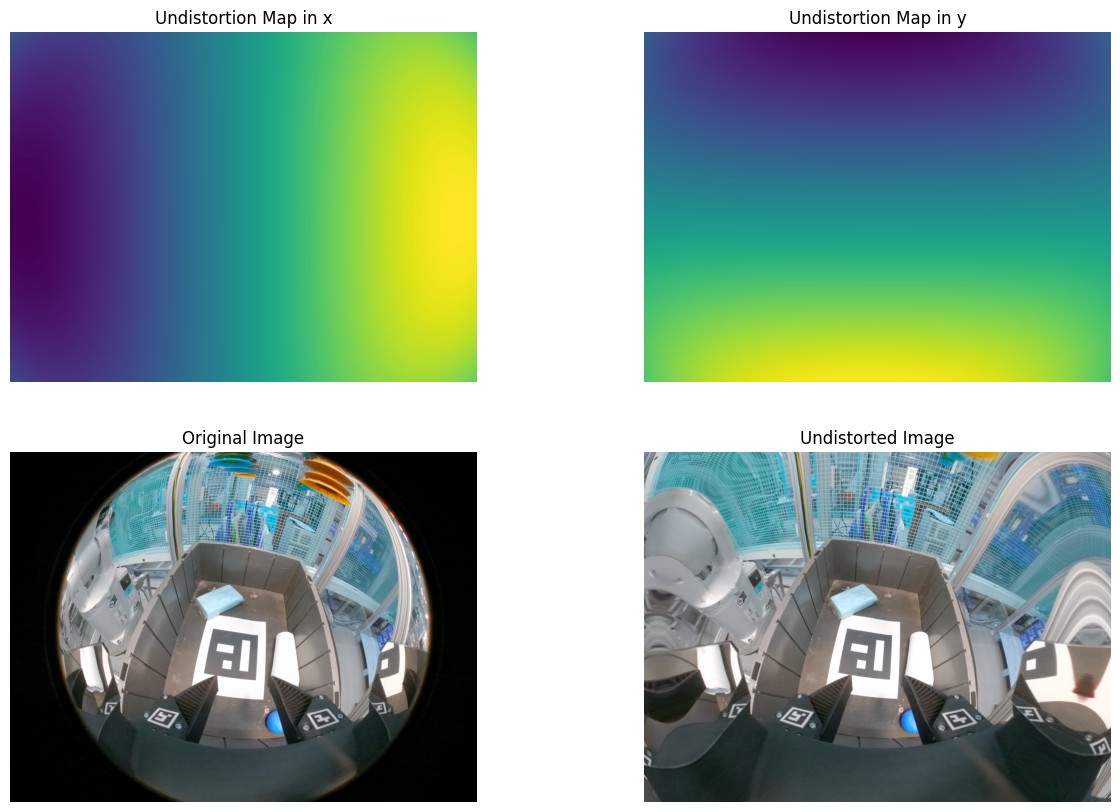

: 

In [51]:
gopro_config_path = "./configs/mono/gopro/fisheye_tote.yaml" 
gopro_config = load_config(gopro_config_path)
gopro_dataset = load_dataset(None, None, gopro_config)
demo_camera_property(gopro_dataset)